# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Print the constructed city URL
    #print(f"Constructed URL for {city}: {city_url}")

    # Make the API request
    #response = requests.get(city_url)
    
    # Print the status code
    #print(f"Status code for {city}: {response.status_code}")
    
    # If the status code is not 200, you might want to handle differently
    #if response.status_code != 200:
        #print(f"Error in fetching data for {city}: Skipping...")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # Use the sleep function to set up a 3-second pause after each each API request
        #sleep(3)
        
        #print(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nar'yan-mar
Processing Record 2 of Set 1 | malango
Processing Record 3 of Set 1 | turiacu
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | pledran
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | xinyuan
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | pimentel
Processing Record 16 of Set 1 | remire-montjoly
Processing Record 17 of Set 1 | veraval
Processing Record 18 of Set 1 | dogubayazit
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | kodigenahalli
Processing Record 2

Processing Record 38 of Set 4 | rajpipla
Processing Record 39 of Set 4 | badger
Processing Record 40 of Set 4 | dem'yanovo
Processing Record 41 of Set 4 | mount pearl
Processing Record 42 of Set 4 | pangai
Processing Record 43 of Set 4 | galliano
Processing Record 44 of Set 4 | kyshtovka
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | nadi
Processing Record 47 of Set 4 | bamboo flat
Processing Record 48 of Set 4 | freetown
Processing Record 49 of Set 4 | ola
Processing Record 0 of Set 5 | espargos
City not found. Skipping...
Processing Record 1 of Set 5 | santa terezinha
Processing Record 2 of Set 5 | quellon
Processing Record 3 of Set 5 | aasiaat
Processing Record 4 of Set 5 | makokou
Processing Record 5 of Set 5 | corsicana
Processing Record 6 of Set 5 | durban
Processing Record 7 of Set 5 | chaozhou
Processing Record 8 of Set 5 | chonchi
Processing Record 9 of Set 5 | kargasok
Processing Record 10 of Set 5 | lata
Processing Record 11 of Set 5 | shache
Process

Processing Record 32 of Set 8 | fuglafjordur
Processing Record 33 of Set 8 | necochea
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | namibe
Processing Record 36 of Set 8 | katsuura
Processing Record 37 of Set 8 | kogon shahri
City not found. Skipping...
Processing Record 38 of Set 8 | san jose village
City not found. Skipping...
Processing Record 39 of Set 8 | asekeyevo
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | amungan
Processing Record 42 of Set 8 | hithadhoo
Processing Record 43 of Set 8 | nikolayevsk-on-amure
Processing Record 44 of Set 8 | tarauaca
Processing Record 45 of Set 8 | cavelossim
Processing Record 46 of Set 8 | eyl
Processing Record 47 of Set 8 | salinopolis
Processing Record 48 of Set 8 | antonio enes
Processing Record 49 of Set 8 | kataragama
City not found. Skipping...
Processing Record 0 of Set 9 | ovalle
Processing Record 1 of Set 9 | cannonvale
Processing Record 2 of Set 9 | international falls
Processing 

City not found. Skipping...
Processing Record 19 of Set 12 | guatrache
Processing Record 20 of Set 12 | shingu
Processing Record 21 of Set 12 | jiwani
Processing Record 22 of Set 12 | fuding
Processing Record 23 of Set 12 | letterkenny
Processing Record 24 of Set 12 | ghadamis
Processing Record 25 of Set 12 | makassar
Processing Record 26 of Set 12 | apucarana
Processing Record 27 of Set 12 | ciudad bolivar
Processing Record 28 of Set 12 | agios nikolaos
Processing Record 29 of Set 12 | leava
Processing Record 30 of Set 12 | lalmohan
Processing Record 31 of Set 12 | xiannu
Processing Record 32 of Set 12 | twon-brass
Processing Record 33 of Set 12 | tadine
Processing Record 34 of Set 12 | benalla
Processing Record 35 of Set 12 | tezu
Processing Record 36 of Set 12 | paulden
Processing Record 37 of Set 12 | peace river
Processing Record 38 of Set 12 | callao
Processing Record 39 of Set 12 | walvis bay
Processing Record 40 of Set 12 | pergamino
Processing Record 41 of Set 12 | palu
Proces

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nar'yan-mar,67.6713,53.0870,16.11,86,100,13.00,RU,1698608388
1,malango,-2.9627,119.9001,64.85,91,100,2.21,ID,1698608389
2,turiacu,-1.6633,-45.3717,86.00,54,87,8.10,BR,1698608389
3,olonkinbyen,70.9221,-8.7187,32.54,70,100,2.98,SJ,1698608389
4,adamstown,-25.0660,-130.1015,72.10,84,99,15.46,PN,1698608142


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nar'yan-mar,67.6713,53.0870,16.11,86,100,13.00,RU,1698608388
1,malango,-2.9627,119.9001,64.85,91,100,2.21,ID,1698608389
2,turiacu,-1.6633,-45.3717,86.00,54,87,8.10,BR,1698608389
3,olonkinbyen,70.9221,-8.7187,32.54,70,100,2.98,SJ,1698608389
4,adamstown,-25.0660,-130.1015,72.10,84,99,15.46,PN,1698608142


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

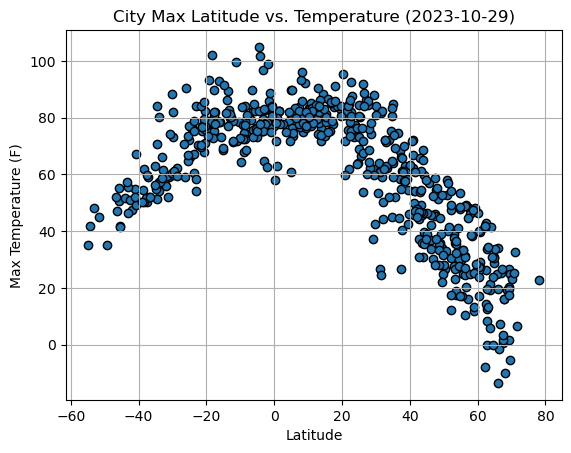

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

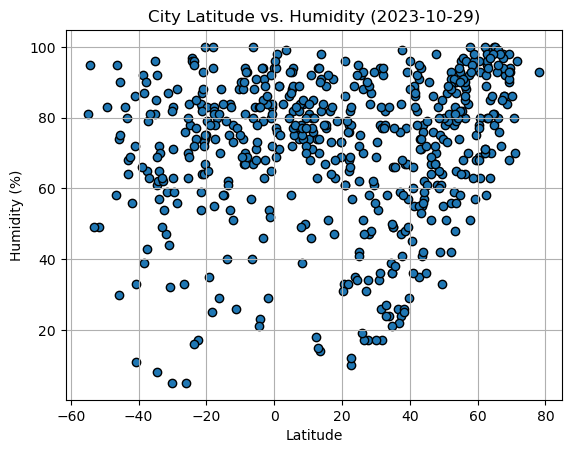

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

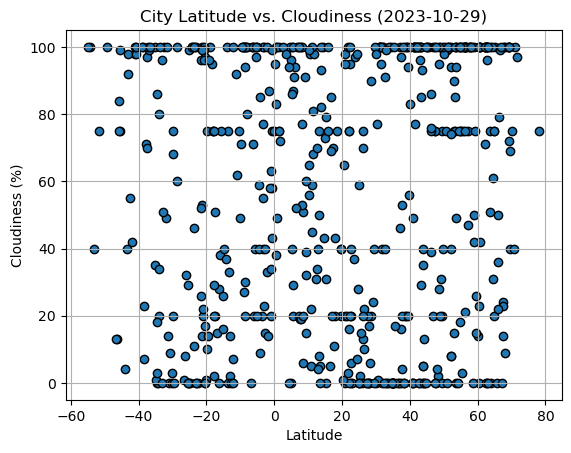

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

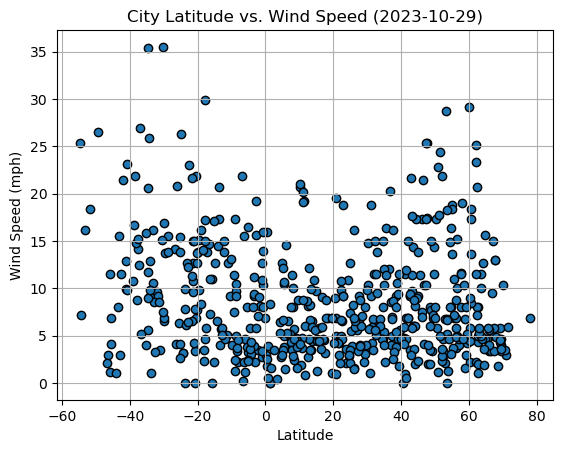

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots

# 1. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# 2. Get/calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# 3. Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print("\n--------------------------------\n ")
print(line_eq)
print("\n--------------------------------")

City_ID
1      84.775724
2      85.750924
4      68.187194
6      49.962049
9      52.570637
         ...    
561    77.943171
562    69.769624
563    61.564781
564    86.330010
566    83.849607
Name: Lat, Length: 185, dtype: float64

--------------------------------
 
y = 0.75x +87.0

--------------------------------


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nar'yan-mar,67.6713,53.0870,16.11,86,100,13.00,RU,1698608388
3,olonkinbyen,70.9221,-8.7187,32.54,70,100,2.98,SJ,1698608389
5,vilyuchinsk,52.9306,158.4028,38.93,78,90,2.10,RU,1698608390
7,pledran,48.4500,-2.7500,51.48,83,2,8.05,FR,1698608391
8,college,64.8569,-147.8028,30.79,78,75,4.61,US,1698608391


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,malango,-2.9627,119.9001,64.85,91,100,2.21,ID,1698608389
2,turiacu,-1.6633,-45.3717,86.00,54,87,8.10,BR,1698608389
4,adamstown,-25.0660,-130.1015,72.10,84,99,15.46,PN,1698608142
6,port-aux-francais,-49.3500,70.2167,35.20,83,100,26.53,TF,1698608390
9,dunedin,-45.8742,170.5036,50.72,74,84,1.14,NZ,1698608269


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8692705458489681
The r-square value is: 0.7556312818805629


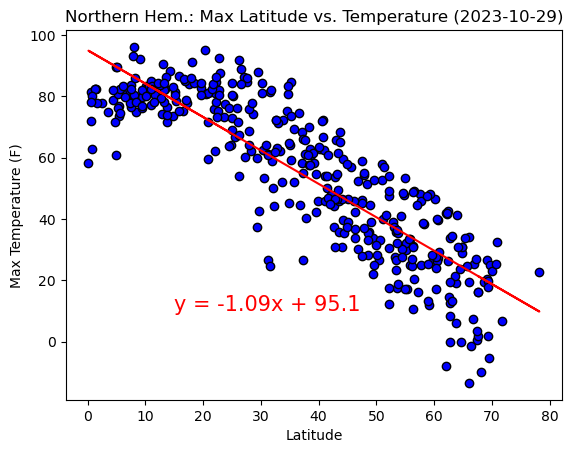

In [97]:
# Linear regression on Northern Hemisphere

# 1. Extract latitude and max temperature data from northern hemisphere DataFrame 
latTemp_x_values = northern_hemi_df["Lat"]
latTemp_y_values = northern_hemi_df["Max Temp"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latTemp_x_values, latTemp_y_values)

# 3. Get/calculate regression values
northern_regress_values = latTemp_x_values * slope + intercept

# 4. Create line equation string
northern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color="blue", edgecolor="black")
plt.plot(latTemp_x_values, northern_regress_values, "r-")
plt.title("Northern Hem.: Max Latitude vs. Temperature (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# 6. Annotate the line equation
plt.annotate(northern_line_eq, (15,10), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

The r-value is: 0.7658990800839622
The r-square value is: 0.5866014008734596


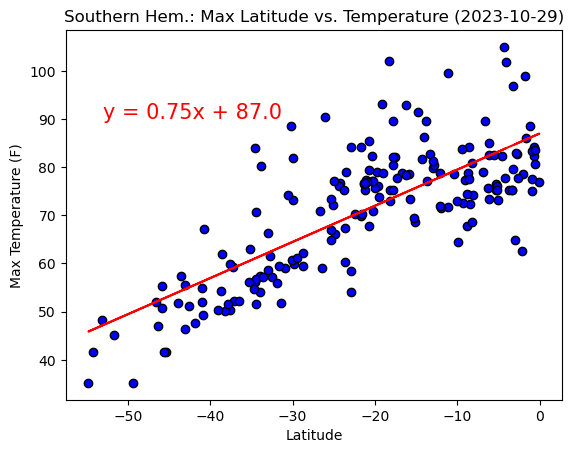

In [98]:
# Linear regression on Southern Hemisphere

# 1. Extract latitude and max temperature data from southern hemisphere DataFrame 
latTemp_x_values = southern_hemi_df["Lat"]
latTemp_y_values = southern_hemi_df["Max Temp"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latTemp_x_values, latTemp_y_values)

# 3. Get/calculate regression values
southern_regress_values = latTemp_x_values * slope + intercept

# 4. Create line equation string
southern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], color="blue", edgecolor="black")
plt.plot(latTemp_x_values, southern_regress_values, color="r", linestyle="solid")
plt.title("Southern Hem.: Max Latitude vs. Temperature (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# 6. Annotate the line equation
plt.annotate(southern_line_eq, (-53,90), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

**Discussion about the linear relationship:**
Both the above Northern and Southern Hemisphere figures illustrate the linear regression between the latitude and maximum temperature variables of the respective sample cities as of 10/29/2023. 

Beginning with the Northern Hemisphere, there is a strong negative correlation (i.e., r-value -0.87 > -0.7) between the variables. As you move north from the equator, the temperature is expected to decrease (i.e., get cooler). Additionally, the r-square value (i.e., 0.76 is closer to 1) indicates that a large proportion of the variability in a city's max temperature is explained by its latitude.

For the Southern Hemisphere, there is a strong positive correlation (i.e., r-value 0.77 > 0.7) between the variables. As you move north from the south pole to the equator, the temperature is expected to increase (i.e., get warmer). However, unlike the Northern Hemisphere, there may be other factors (e.g., elevation/altitude, ocean currents, or human activity) that explain the variability in a city's max temperature besides its latitude given the r-square value of 0.59. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17198319699420392
The r-square value is: 0.02957822004834715


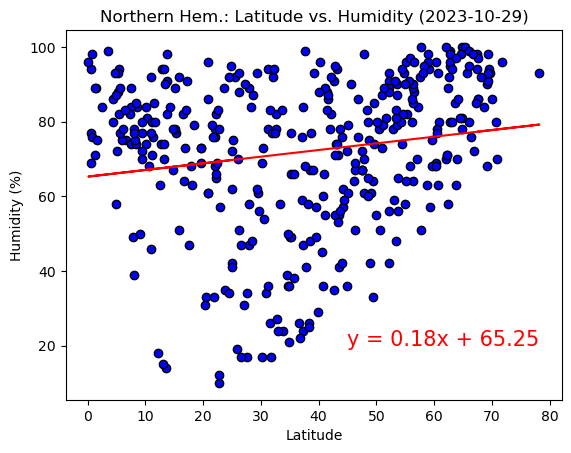

In [106]:
# Linear regression on Northern Hemisphere

# 1. Extract latitude and humidity data from northern hemisphere DataFrame 
latHum_x_values = northern_hemi_df["Lat"]
latHum_y_values = northern_hemi_df["Humidity"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latHum_x_values, latHum_y_values)

# 3. Get/calculate regression values
northern_regress_values = latHum_x_values * slope + intercept

# 4. Create line equation string
northern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], color="blue", edgecolor="black")
plt.plot(latHum_x_values, northern_regress_values, "r-")
plt.title("Northern Hem.: Latitude vs. Humidity (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# 6. Annotate the line equation
plt.annotate(northern_line_eq, (45,20), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

The r-value is: 0.13433979382418562
The r-square value is: 0.018047180204724702


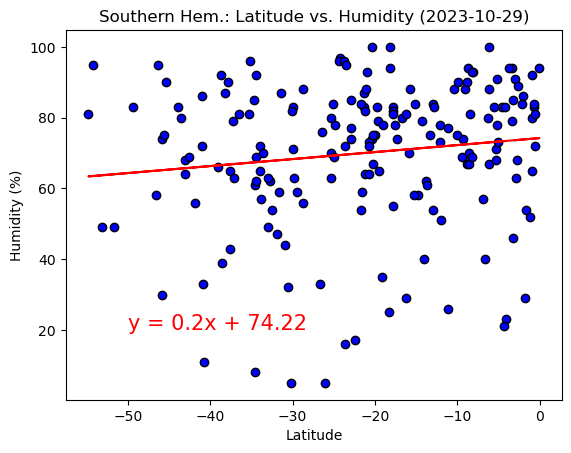

In [108]:
# Linear regression on Southern Hemisphere

# 1. Extract latitude and humidity data from southern hemisphere DataFrame 
latHum_x_values = southern_hemi_df["Lat"]
latHum_y_values = southern_hemi_df["Humidity"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latHum_x_values, latHum_y_values)

# 3. Get/calculate regression values
southern_regress_values = latHum_x_values * slope + intercept

# 4. Create line equation string
southern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], color="blue", edgecolor="black")
plt.plot(latHum_x_values, southern_regress_values, "r-")
plt.title("Southern Hem.: Latitude vs. Humidity (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# 6. Annotate the line equation
plt.annotate(southern_line_eq, (-50,20), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

**Discussion about the linear relationship:** 
Both the above Northern and Southern Hemisphere figures illustrate the linear regression between the latitude and humidity variables of the respective sample cities as of 10/29/2023.

The Northern and Southern Hemisphere r-values of 0.17 and 0.13, respectively, < 0.3 indicate a very weak correlation between the variables. Additionally, their r-square values of 0.03 and 0.02, respectively, being closer to 0 indicate that a large proportion of the variability in a city's humidity is not explained by its latitude. Again, examples like elevation/altitude, ocean currents, or human activity could impact variability.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11915060081548066
The r-square value is: 0.014196865674690022


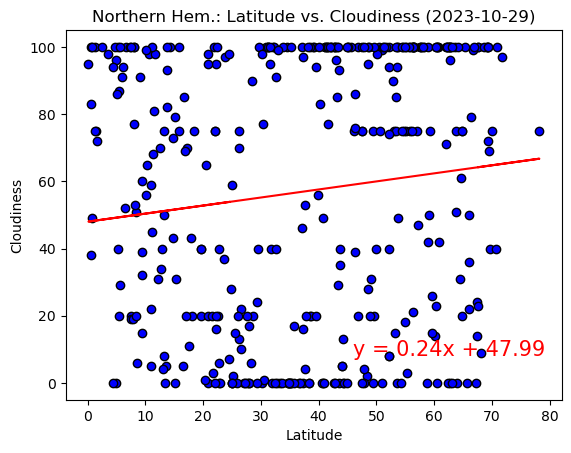

In [116]:
# Linear regression on Northern Hemisphere

# 1. Extract latitude and humidity data from northern hemisphere DataFrame 
latCld_x_values = northern_hemi_df["Lat"]
latCld_y_values = northern_hemi_df["Cloudiness"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latCld_x_values, latCld_y_values)

# 3. Get/calculate regression values
northern_regress_values = latCld_x_values * slope + intercept

# 4. Create line equation string
northern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], color="blue", edgecolor="black")
plt.plot(latCld_x_values, northern_regress_values, "r-")
plt.title("Northern Hem.: Latitude vs. Cloudiness (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# 6. Annotate the line equation
plt.annotate(northern_line_eq, (46,8), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

The r-value is: -0.02046445020454303
The r-square value is: 0.0004187937221742213


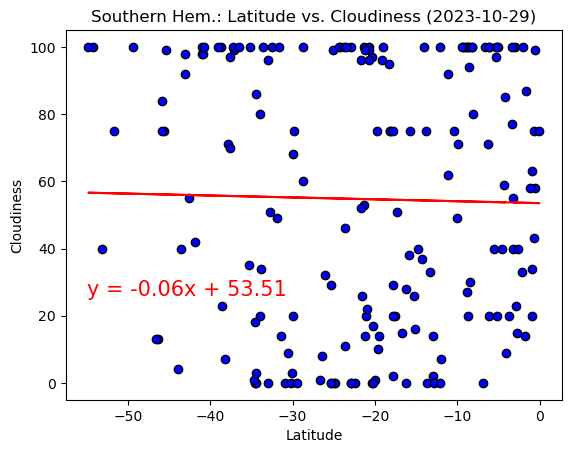

In [120]:
# Linear regression on Southern Hemisphere

# 1. Extract latitude and humidity data from southern hemisphere DataFrame 
latCld_x_values = southern_hemi_df["Lat"]
latCld_y_values = southern_hemi_df["Cloudiness"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latCld_x_values, latCld_y_values)

# 3. Get/calculate regression values
southern_regress_values = latCld_x_values * slope + intercept

# 4. Create line equation string
southern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], color="blue", edgecolor="black")
plt.plot(latCld_x_values, southern_regress_values, "r-")
plt.title("Southern Hem.: Latitude vs. Cloudiness (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# 6. Annotate the line equation
plt.annotate(southern_line_eq, (-55,26), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

**Discussion about the linear relationship:** Both the above Northern and Southern Hemisphere figures illustrate the linear regression between the latitude and cloudiness variables of the respective sample cities as of 10/29/2023.

The Northern and Southern Hemisphere r-values of 0.12 and -0.02, respectively, < 0.3 indicate a very weak correlation between the variables. Additionally, their r-square values of 0.01 and 0.00, respectively, being closer to or at 0 indicate that almost no proportion of the variability in cloudiness a city experiences is explained by its latitude. Again, examples like elevation/altitude, ocean currents, mountains/mountain ranges, or human activity could impact variability.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13524971860826446
The r-square value is: 0.018292486383614717


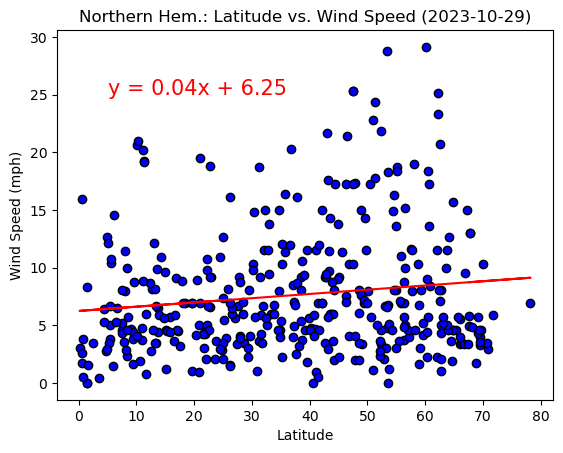

In [125]:
# Linear regression on Northern Hemisphere

# 1. Extract latitude and humidity data from northern hemisphere DataFrame 
latWin_x_values = northern_hemi_df["Lat"]
latWin_y_values = northern_hemi_df["Wind Speed"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latWin_x_values, latWin_y_values)

# 3. Get/calculate regression values
northern_regress_values = latWin_x_values * slope + intercept

# 4. Create line equation string
northern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], color="blue", edgecolor="black")
plt.plot(latWin_x_values, northern_regress_values, "r-")
plt.title("Northern Hem.: Latitude vs. Wind Speed (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# 6. Annotate the line equation
plt.annotate(northern_line_eq, (5,25), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

The r-value is: -0.25133760791268156
The r-square value is: 0.06317059315126884


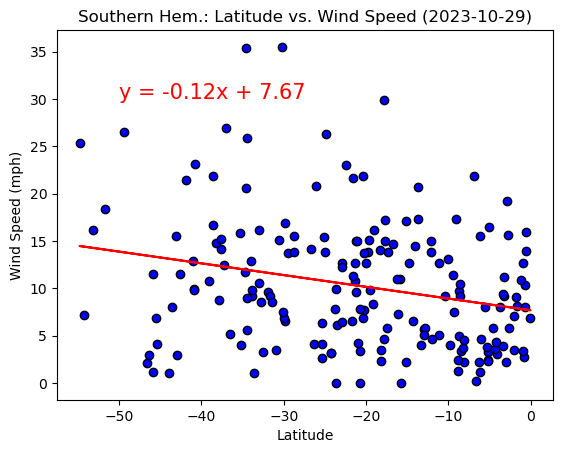

In [126]:
# Linear regression on Southern Hemisphere

# 1. Extract latitude and humidity data from southern hemisphere DataFrame 
latWin_x_values = southern_hemi_df["Lat"]
latWin_y_values = southern_hemi_df["Wind Speed"]

# 2. Calculate/perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latWin_x_values, latWin_y_values)

# 3. Get/calculate regression values
southern_regress_values = latWin_x_values * slope + intercept

# 4. Create line equation string
southern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 5. Create scatter and regression line plot, and incorporate other graph properties
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color="blue", edgecolor="black")
plt.plot(latWin_x_values, southern_regress_values, "r-")
plt.title("Southern Hem.: Latitude vs. Wind Speed (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# 6. Annotate the line equation
plt.annotate(southern_line_eq, (-50,30), fontsize=15, color="red")

# 7. Print the r-value
print(f"The r-value is: {rvalue}\nThe r-square value is: {rvalue**2}")

# 8. Show the plot
plt.show()

**Discussion about the linear relationship:** Both the above Northern and Southern Hemisphere figures illustrate the linear regression between the latitude and wind speed variables of the respective sample cities as of 10/29/2023.

The Northern and Southern Hemisphere r-values of 0.14 and -0.25, respectively, < 0.3 indicate a weak correlation between the variables. Additionally, their r-square values of 0.02 and 0.06, respectively, being closer 0 indicate that almost no proportion of the variability of the wind speed a city experiences is explained by its latitude. Again, examples like elevation/altitude, ocean currents, mountains/mountain ranges, or human activity could impact variability.